In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import scipy.io
from scipy.signal import lfilter,butter,filtfilt
import itertools
from scipy.stats import pearsonr
from scipy.signal import welch
#import seaborn as sns

In [6]:
nic=scipy.io.loadmat('CircuitROIsMTS/LMP_NIC_15_FP_mean_denoisedTS.mat')
data = nic['mts'].T
print(data.shape)

(29, 3890)


In [7]:
roinames = nic["roi_names"].flatten()
for name in roinames:
    print(name[0])

ACC
L_Acb
L_Amygdala
L_Amygdala_CM_Juelich50
L_Amygdala_LB_Juelich50_minus_intersect
L_Amygdala_SF_Juelich50
L_Caudate
L_FOrb
L_Hipp
L_Insula
L_MidFG
L_Pallidum
L_Putamen
L_SN_Hammersn30r83_74
L_Thalamus
R_Acb
R_Amygdala
R_Amygdala_CM_Juelich50
R_Amygdala_LB_Juelich50_minus_intersect
R_Amygdala_SF_Juelich50
R_Caudate
R_FOrb
R_Hipp
R_Insula
R_MidFG
R_Pallidum
R_Putamen
R_SN_Hammersn30r83_75
R_Thalamus


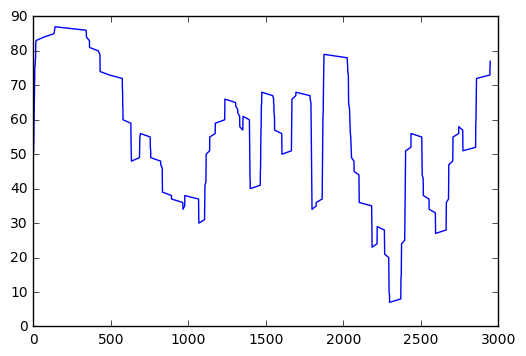

In [8]:
nict = scipy.io.loadmat('CircuitROIsMTS/LMP_NIC_15-FP/04-May-2017_09-43_LMP_NIC_15_FP.mat')
craving = nict['craveUpdate']
crav_t=(craving[0][0][0].T).flatten()
crav_v=(craving[0][0][1].T).flatten()
plt.plot(crav_t,crav_v)

In [9]:
# create a 10th order Butterworth filter from 0.01 to 0.1 Hz
def butter_bandpass(lowcut,highcut,fs,order=8):
    nyq = 0.5*fs
    low = lowcut/nyq
    high = highcut/nyq

    b,a = butter(order, [low, high], btype='band')
    return b,a

def butter_bandpass_filter(data,lowcut,highcut,fs,order=5):
    b,a = butter_bandpass(lowcut,highcut,fs,order=order)
    return filtfilt(b,a,data)

# create a 10th order Butterworth filter from 0.01 to 0.1 Hz
def butter_lowpass(lowcut,fs,order=8):
    nyq = 0.5*fs
    low = lowcut/nyq

    b,a = butter(order, low, btype='low')
    return b,a

def butter_lowpass_filter(data,lowcut,fs,order=5):
    b,a = butter_lowpass(lowcut,fs,order=order)
    return filtfilt(b,a,data)

sampling_freq = 1/0.802
print(sampling_freq)

1.2468827930174562


[ 316  556  796 1036 1276 1516 1756 1996 2236 2476]


/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


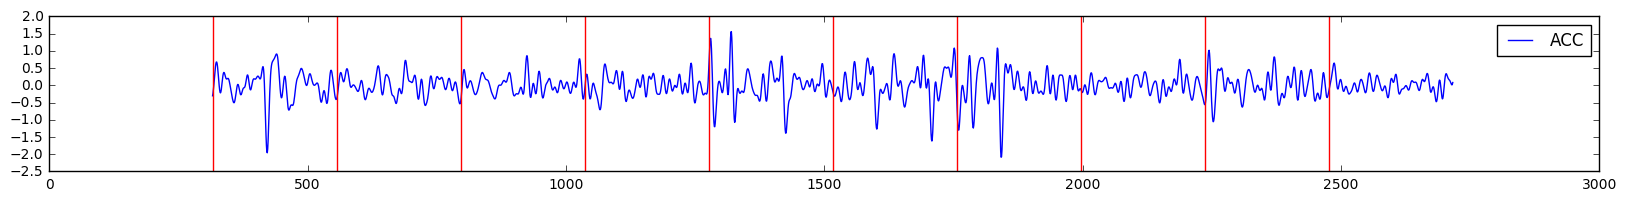

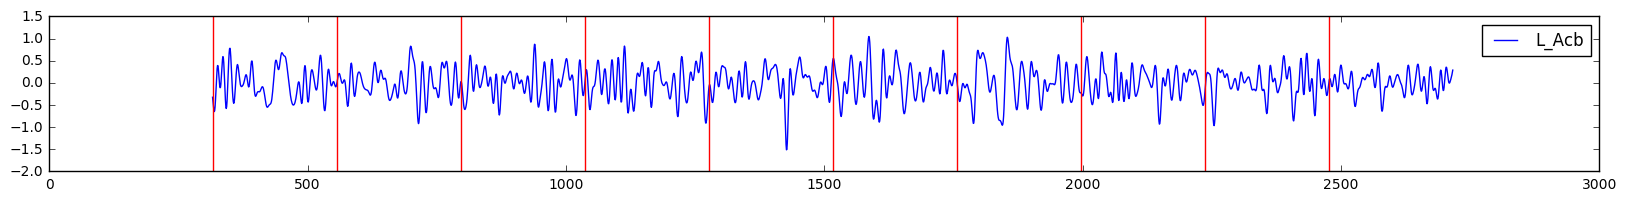

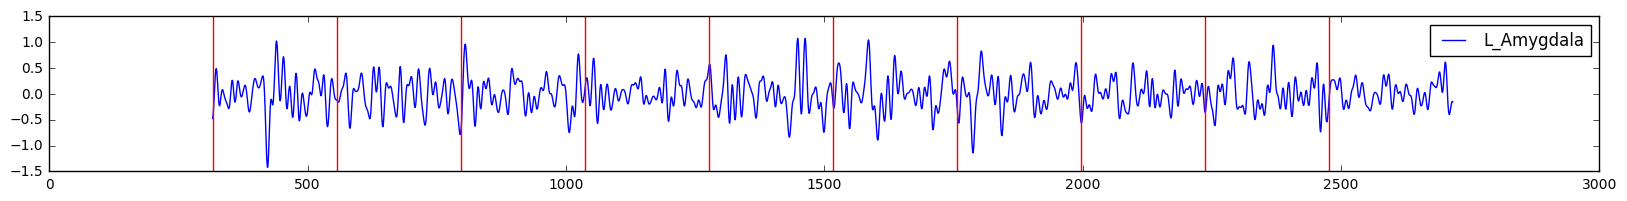

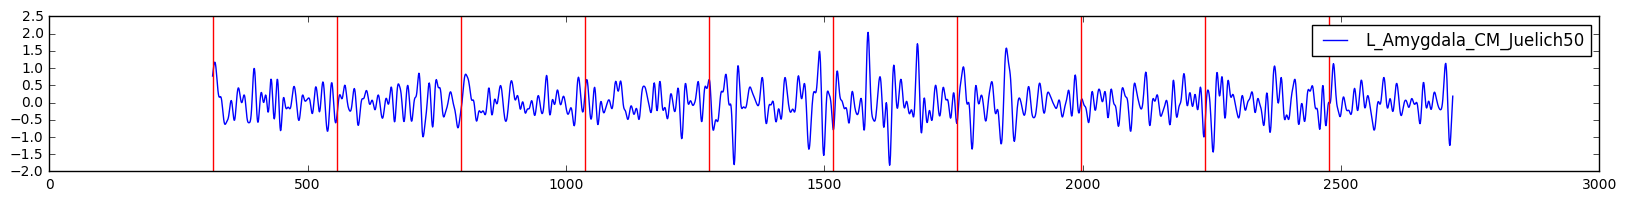

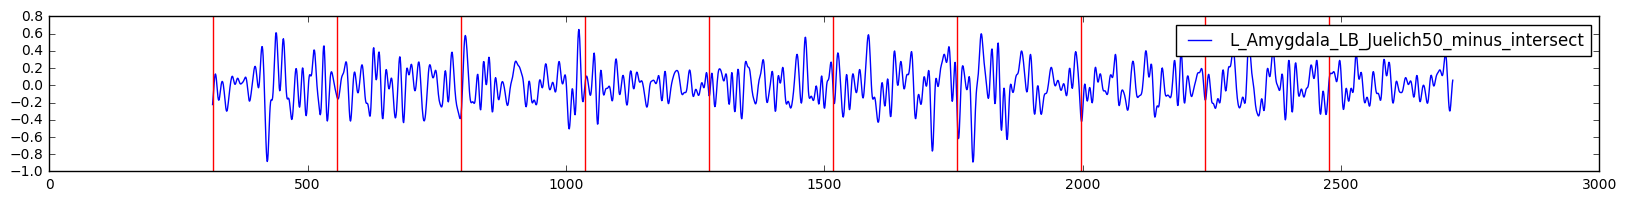

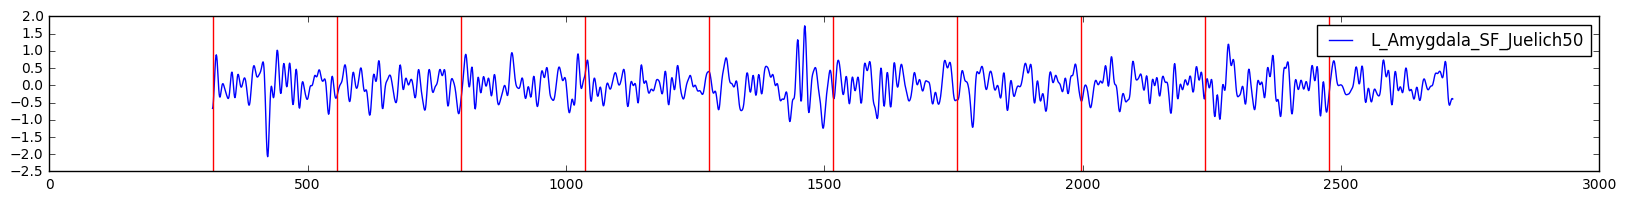

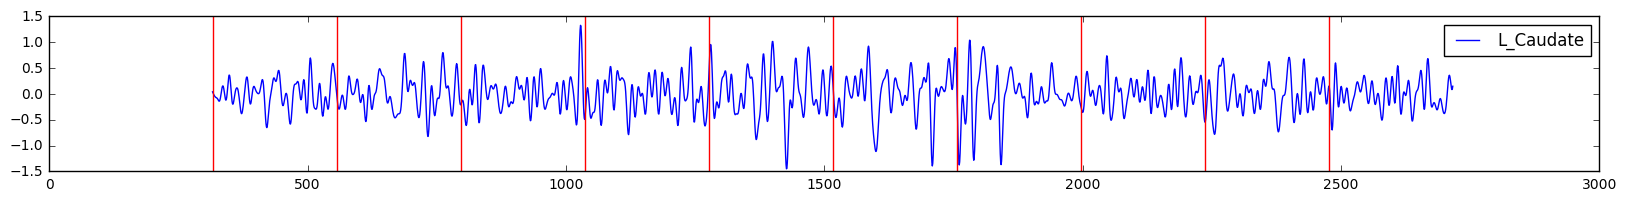

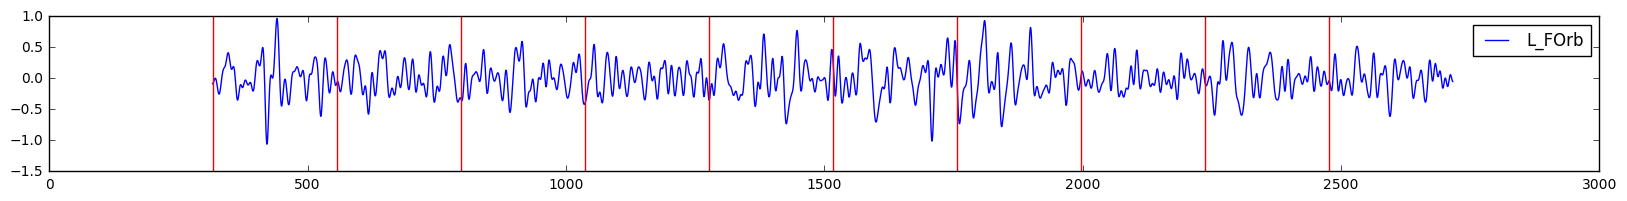

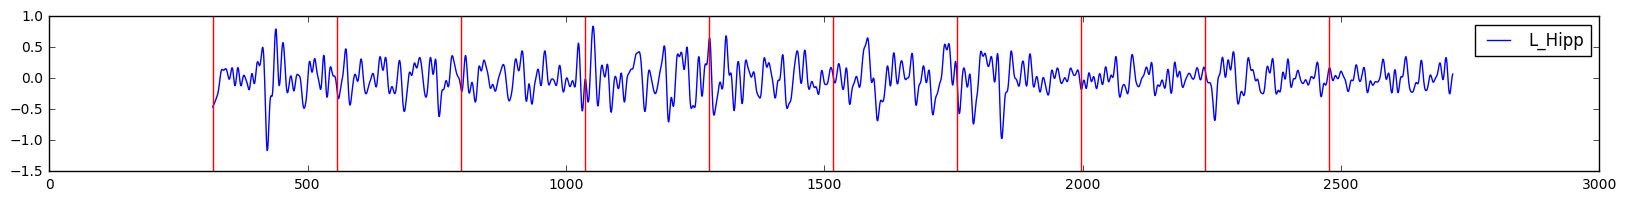

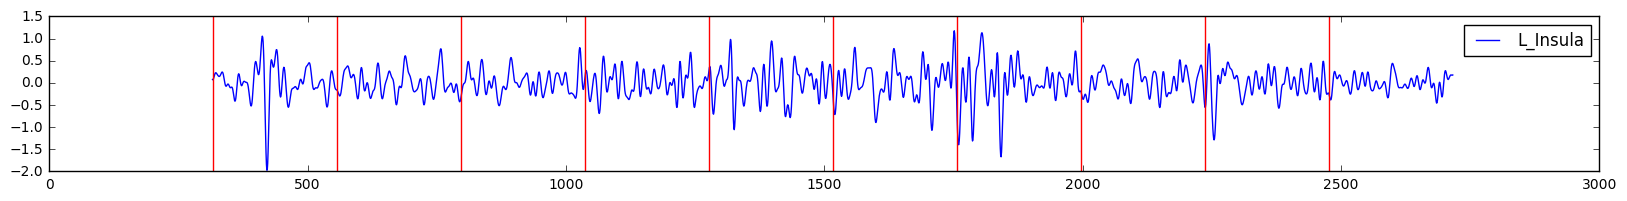

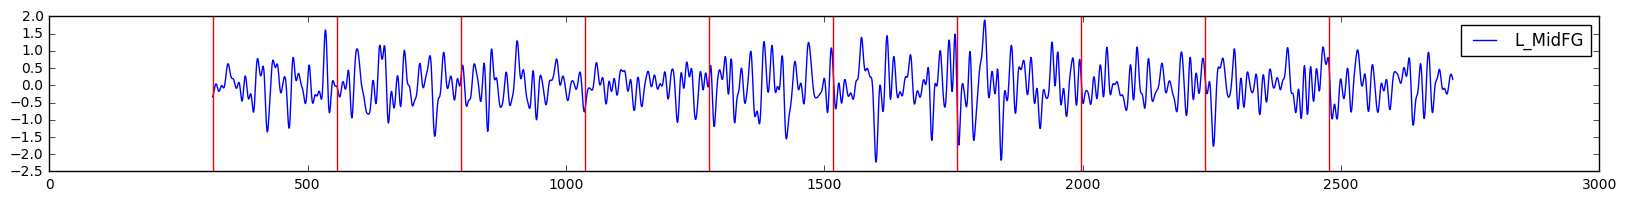

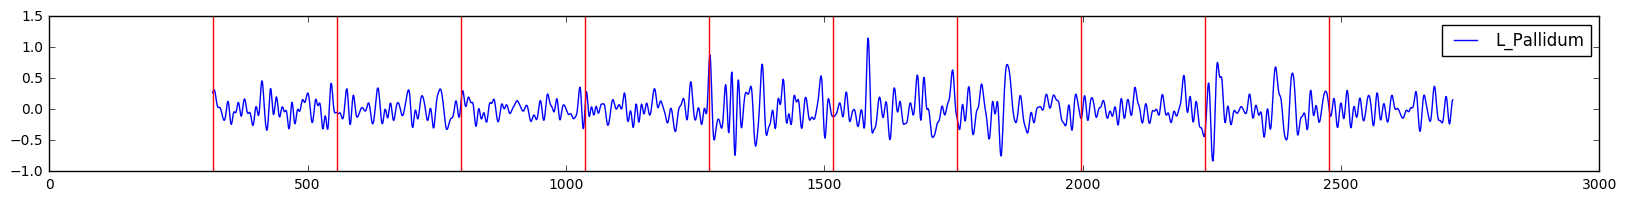

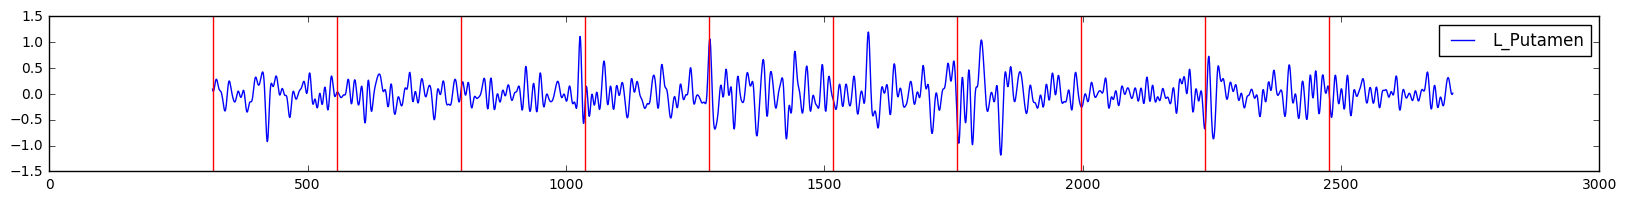

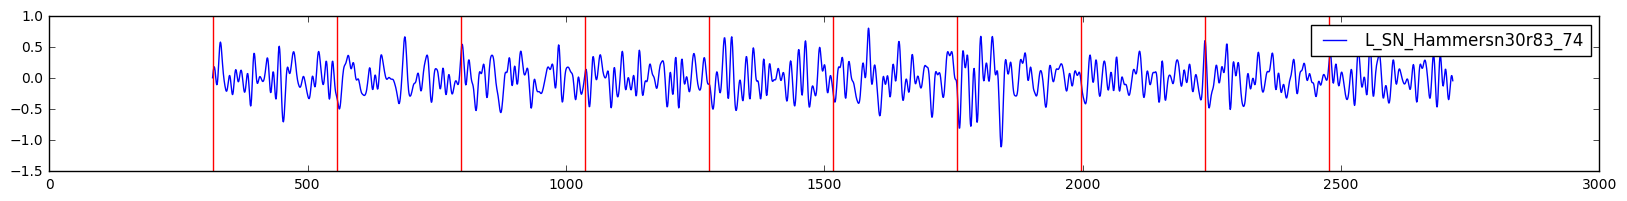

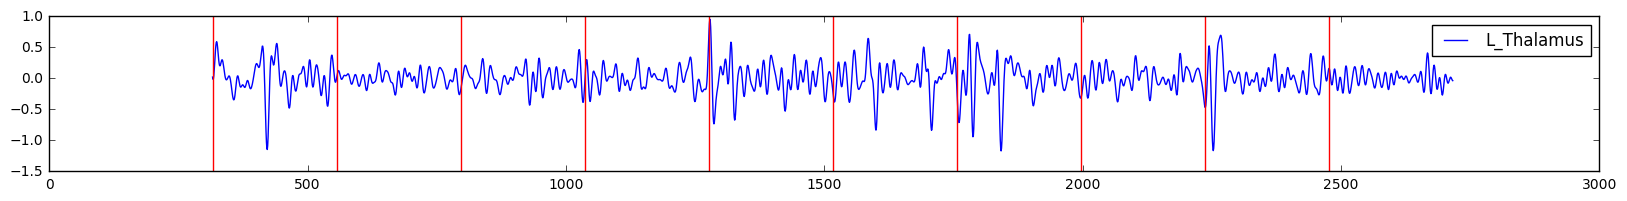

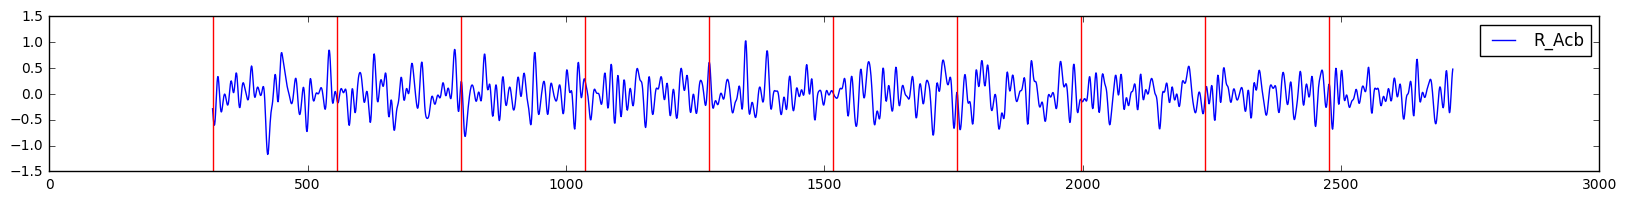

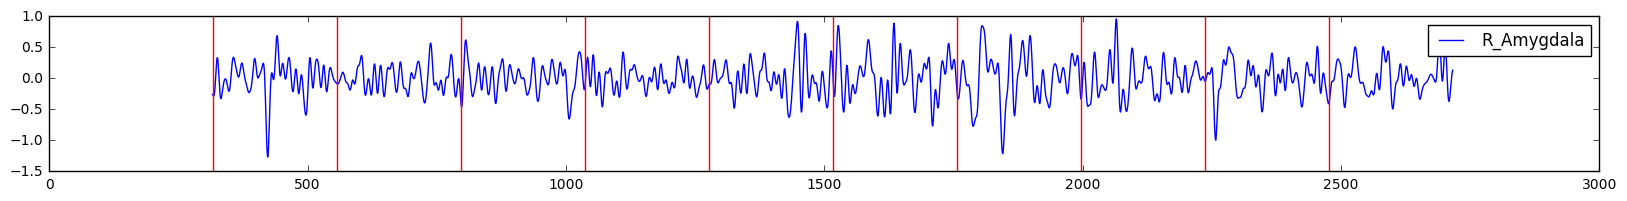

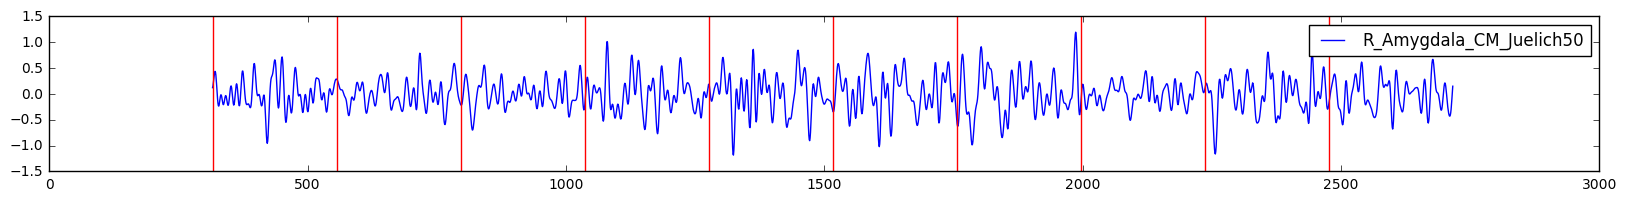

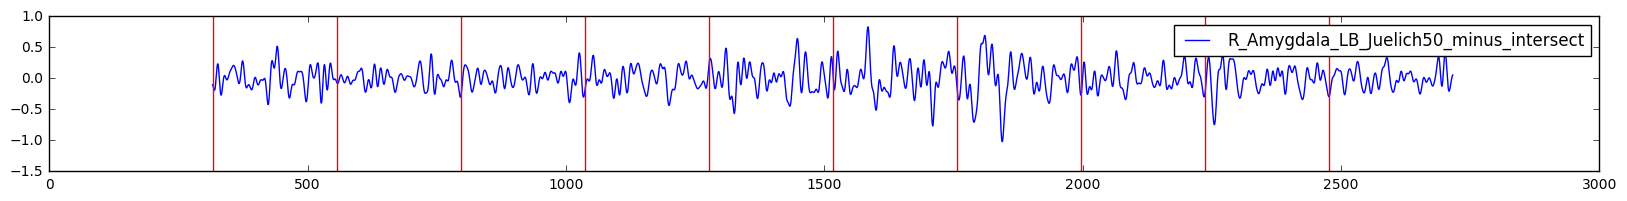

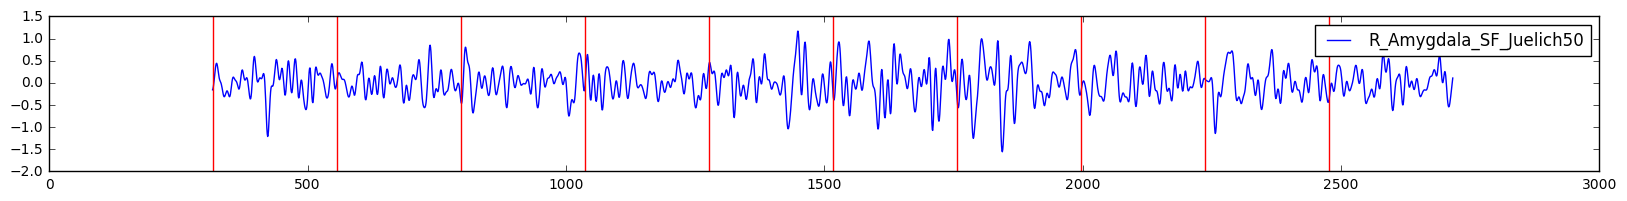

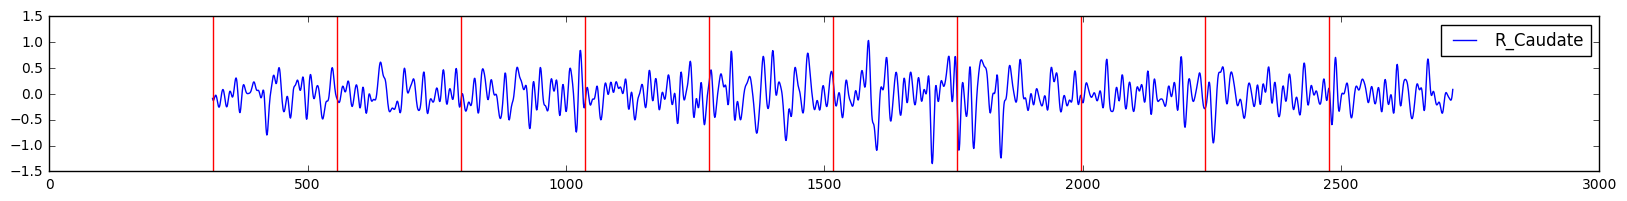

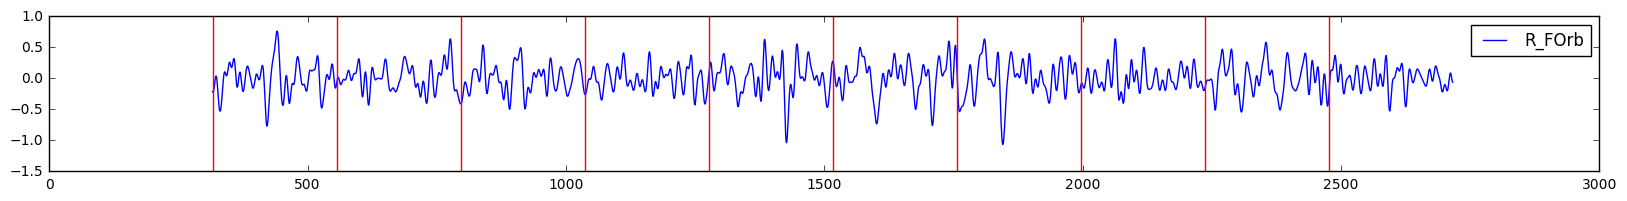

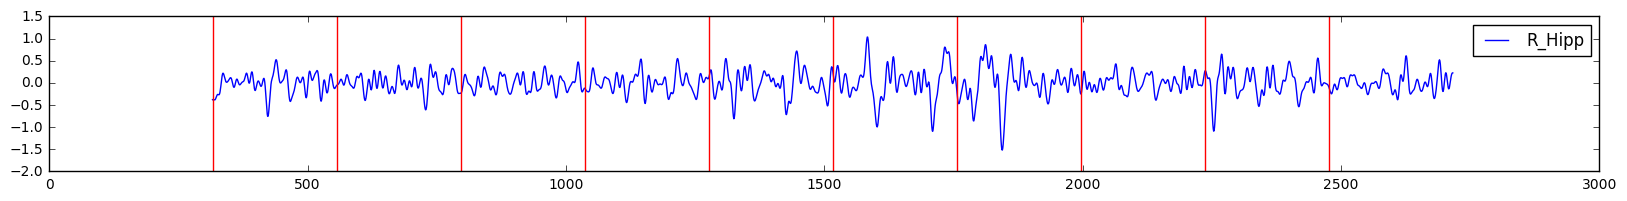

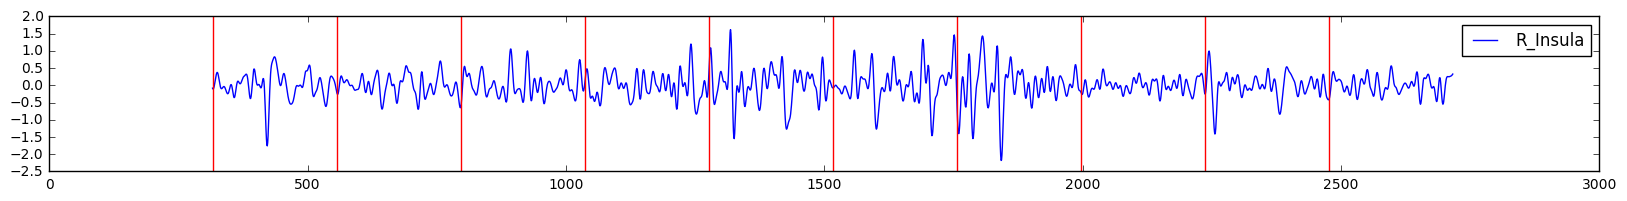

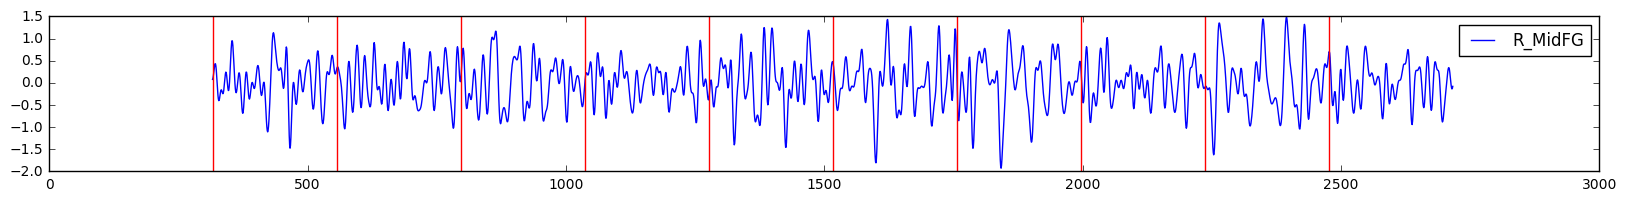

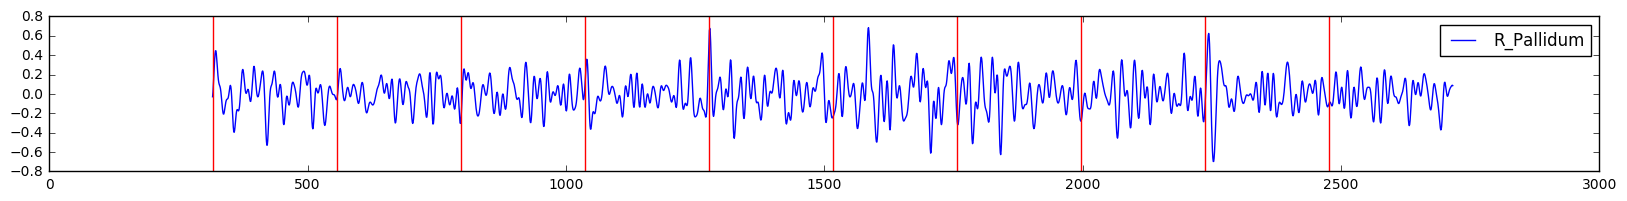

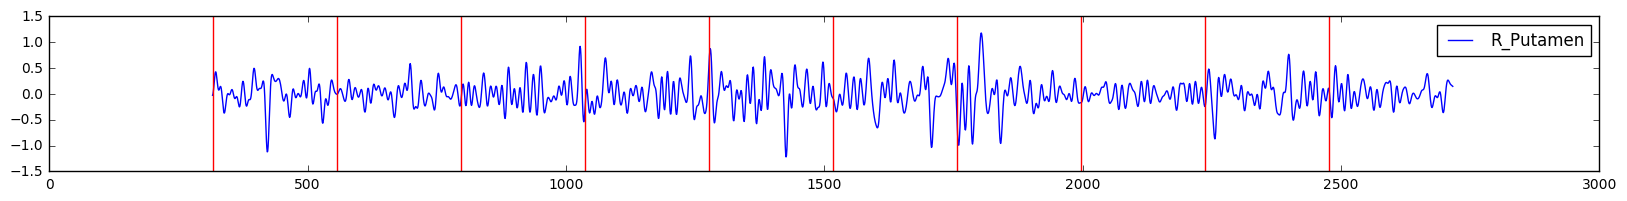

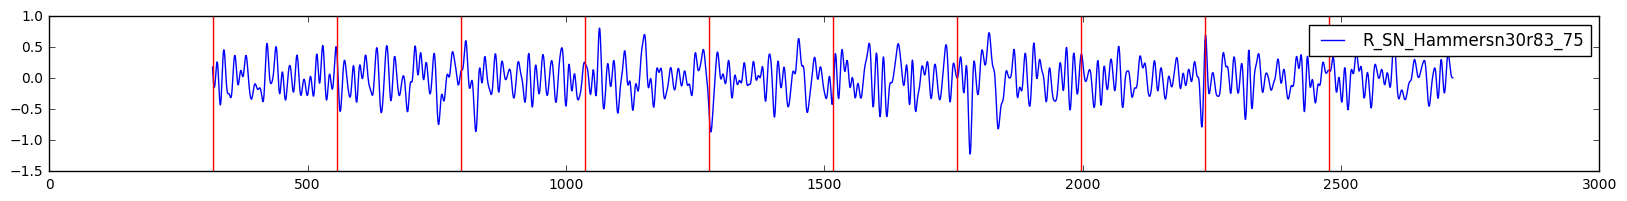

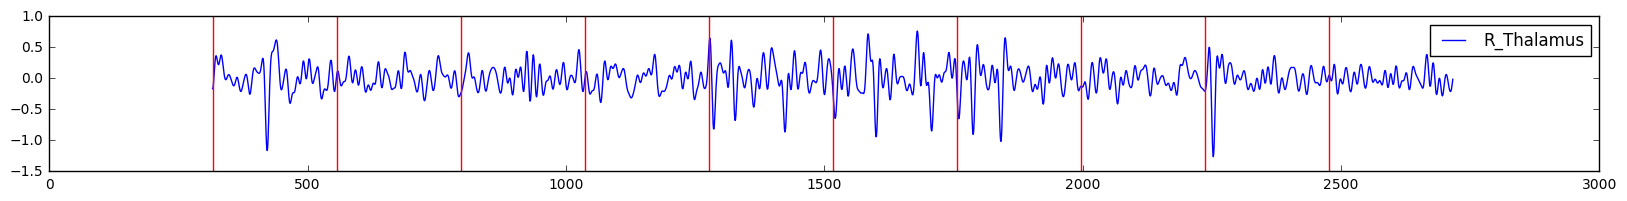

In [10]:
# comment about the indexing:
# the puffs start at second 316 and then happen every 4min = 240sec
# 316/0.802 = 394
# 2400/0.802 = 2992.52
t = np.linspace(0,3889*.802,3890)
data_filtered = None
puffs=np.arange(316,2500,240)
print(puffs)
for trace,name in zip(data,roinames):
    trace_filtered = butter_bandpass_filter(trace,0.01,0.1,sampling_freq,order=5)
    plt.figure(figsize=(20,2))
    plt.plot(t[394:394+2994],trace_filtered[394:394+2994],label=name[0])
#    plt.xlim((0,1000))
    for p in puffs:
        plt.axvline(x=p,color="r")
    plt.legend()
    if data_filtered is None:
        data_filtered = trace_filtered
    else:
        data_filtered = np.vstack((data_filtered,trace_filtered))

In [11]:
data_filtered.shape

(29, 3890)

/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


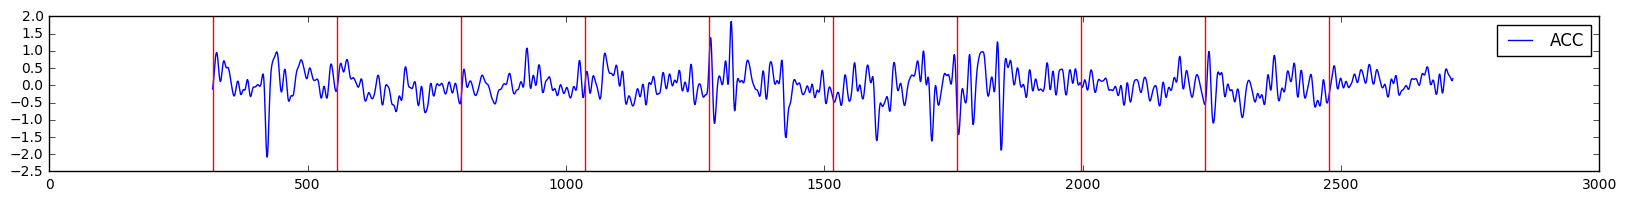

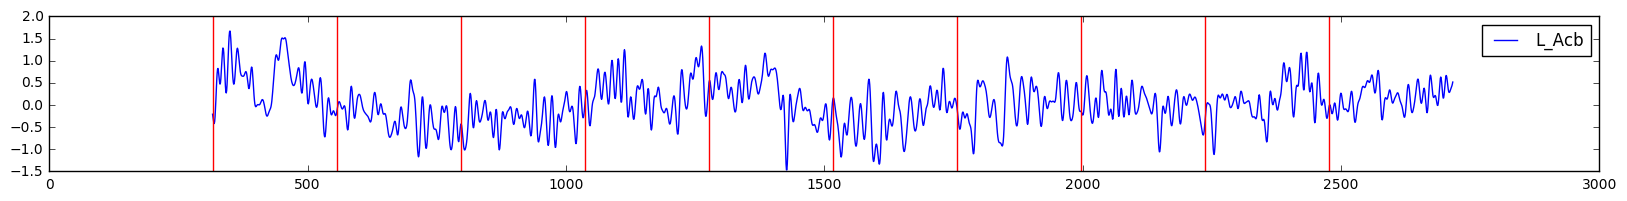

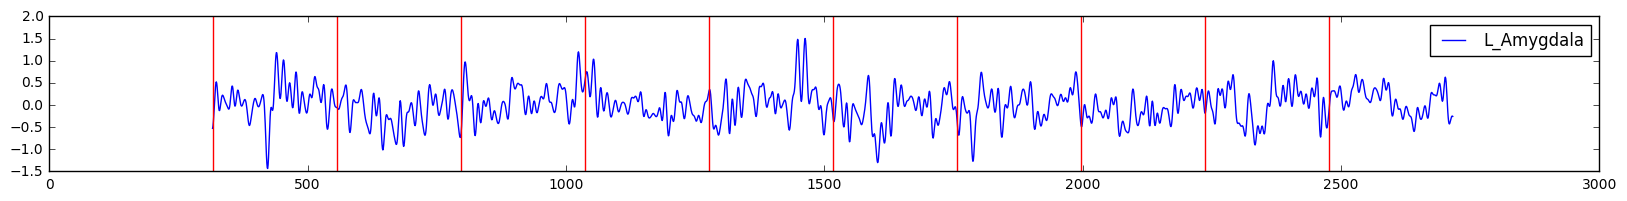

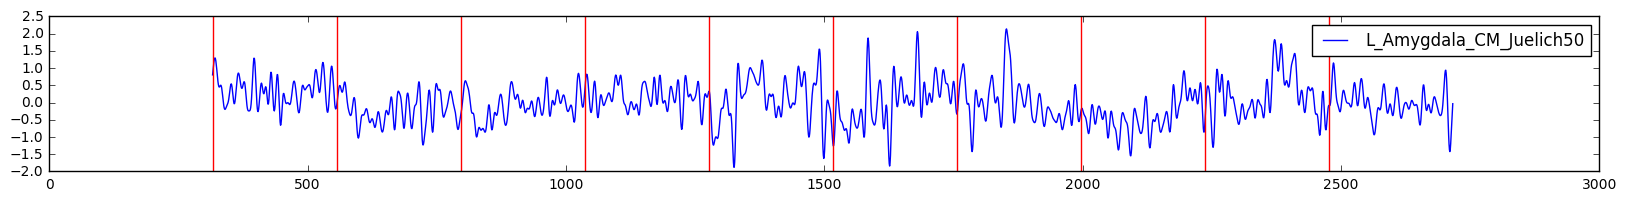

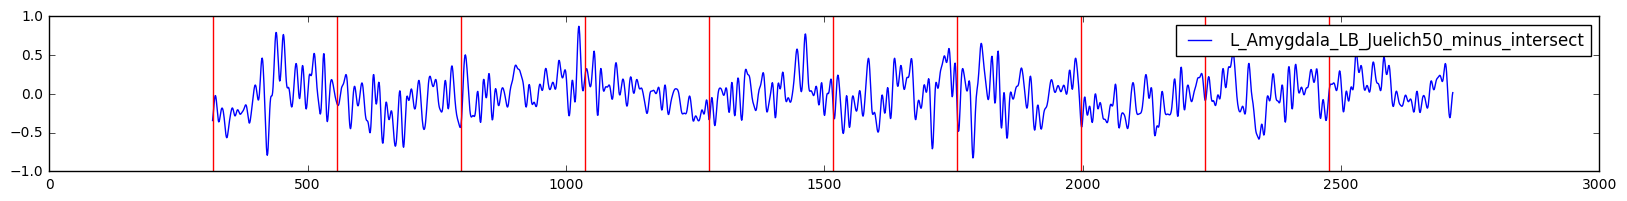

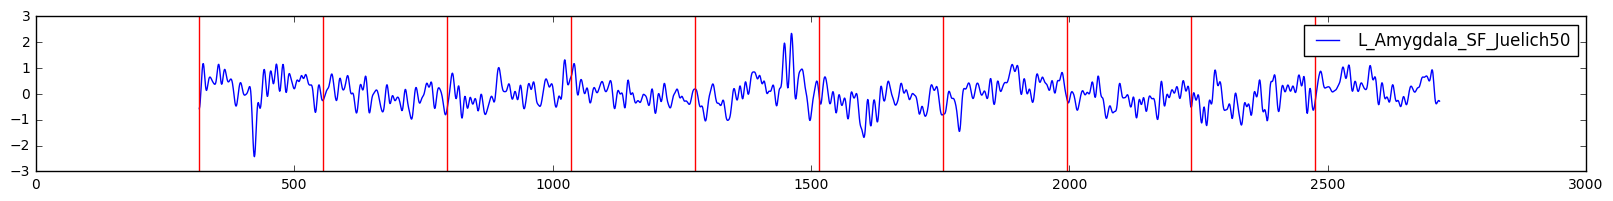

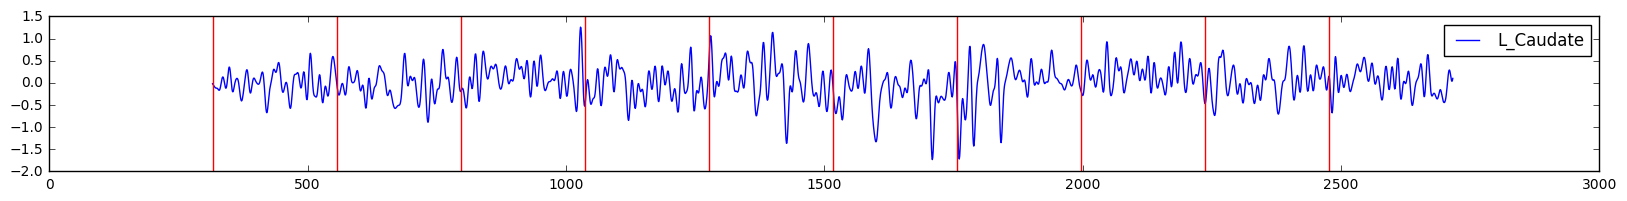

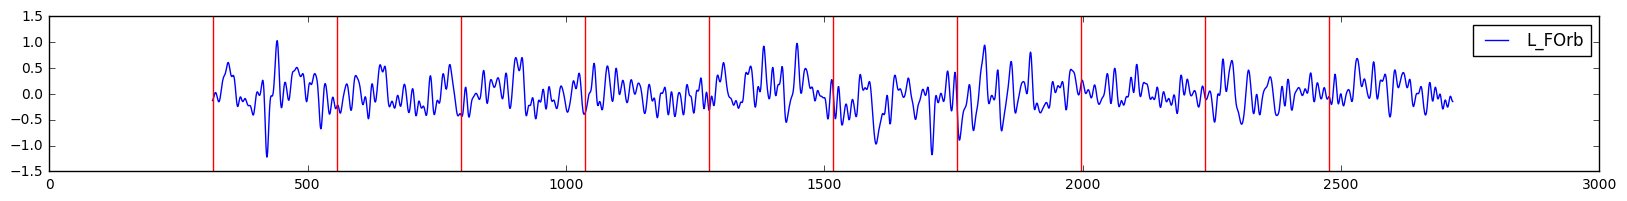

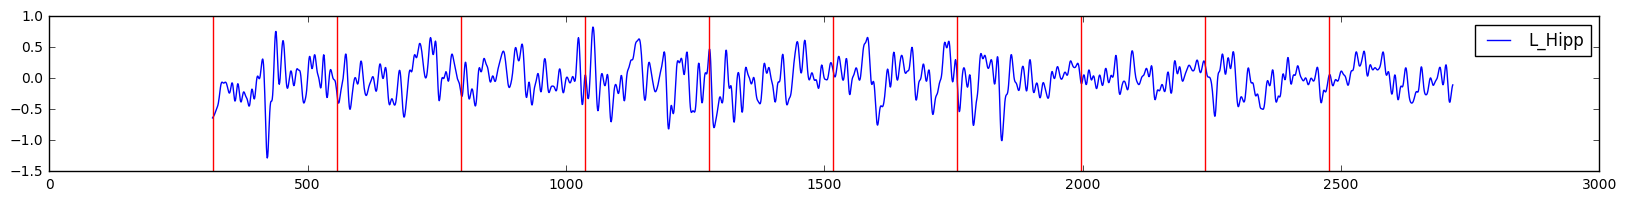

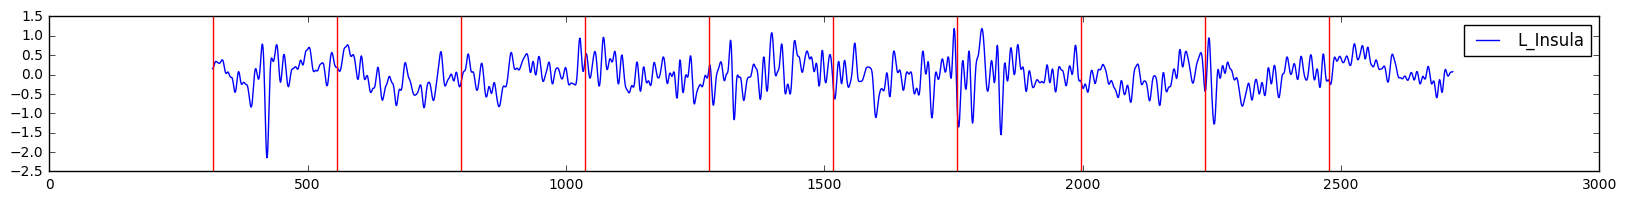

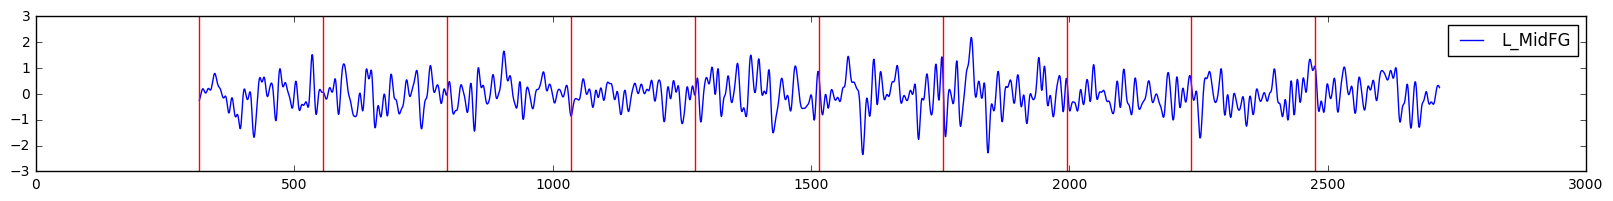

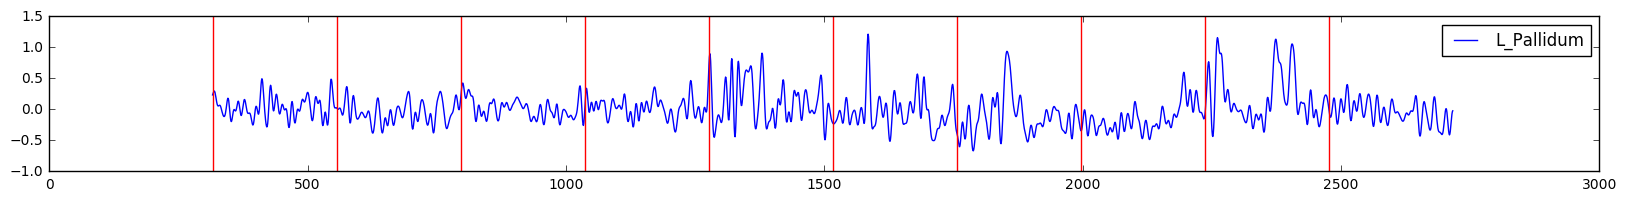

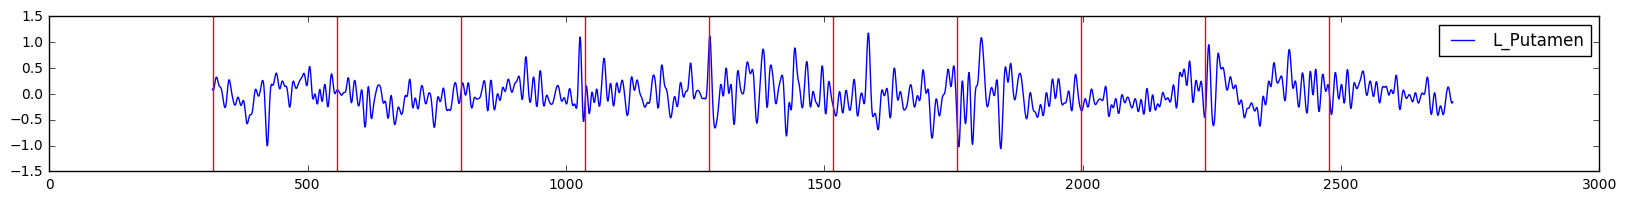

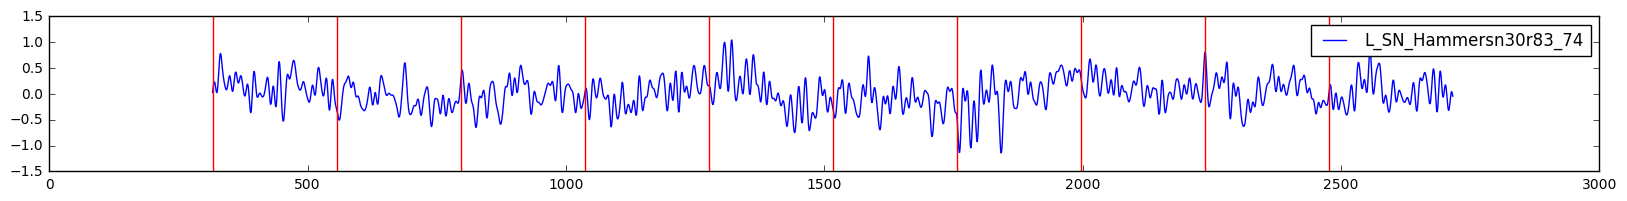

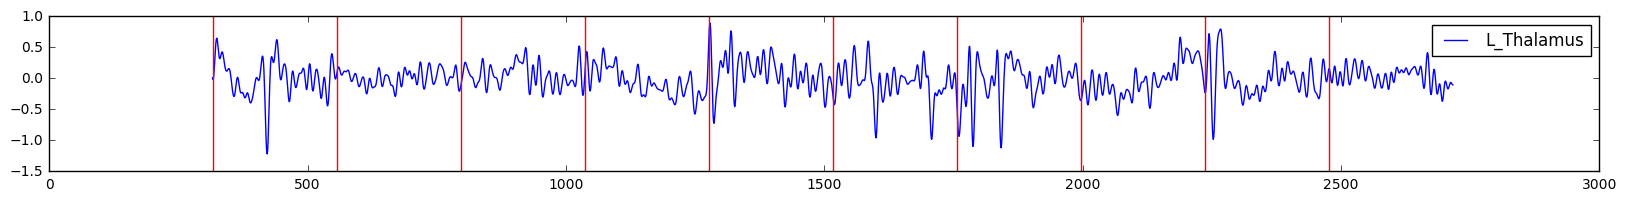

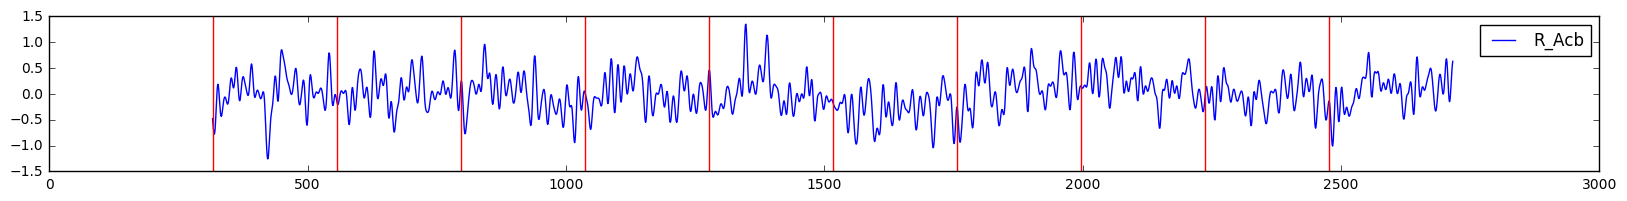

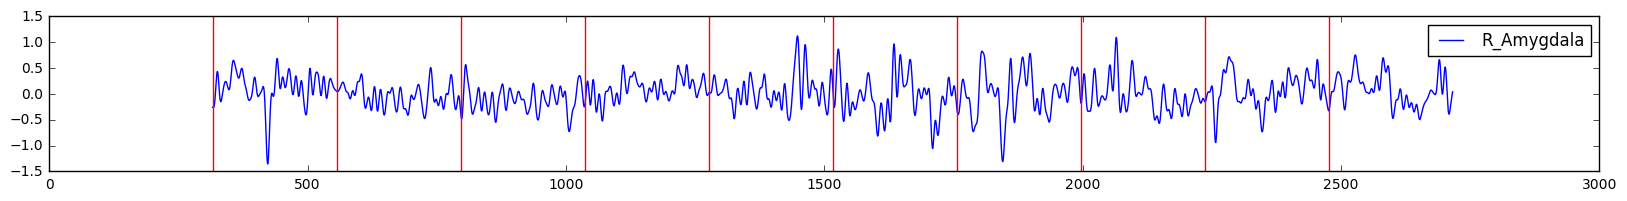

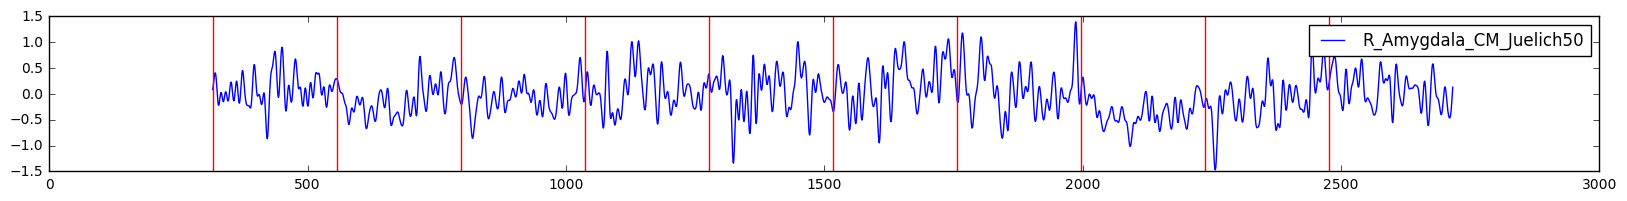

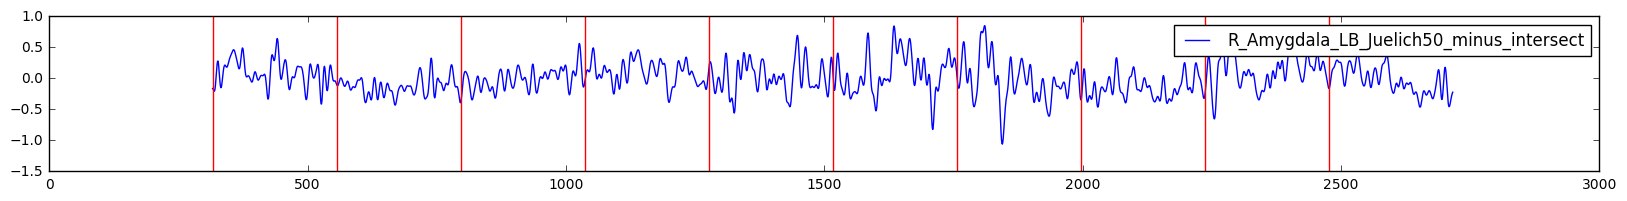

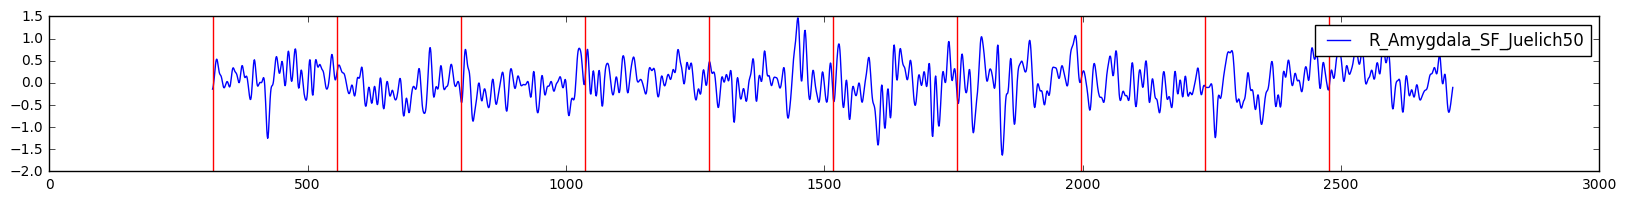

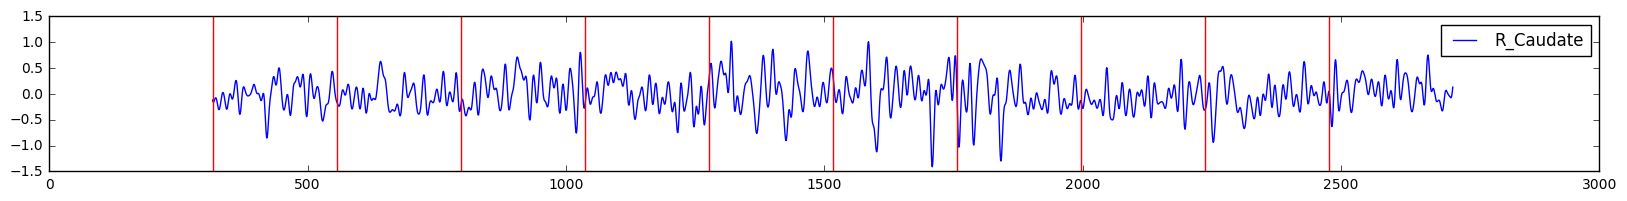

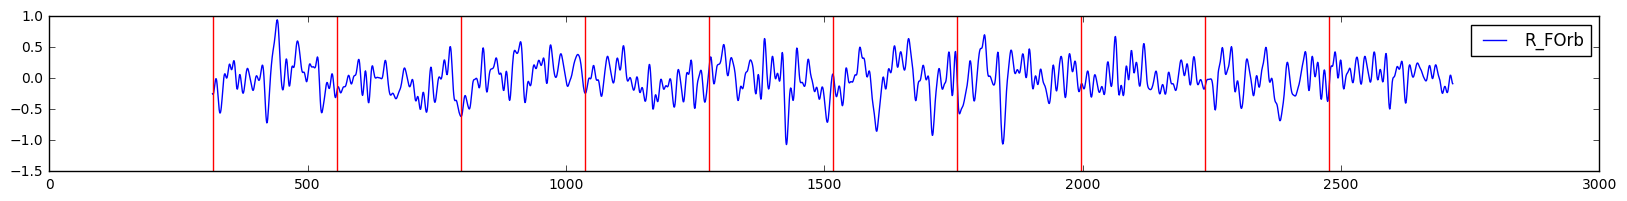

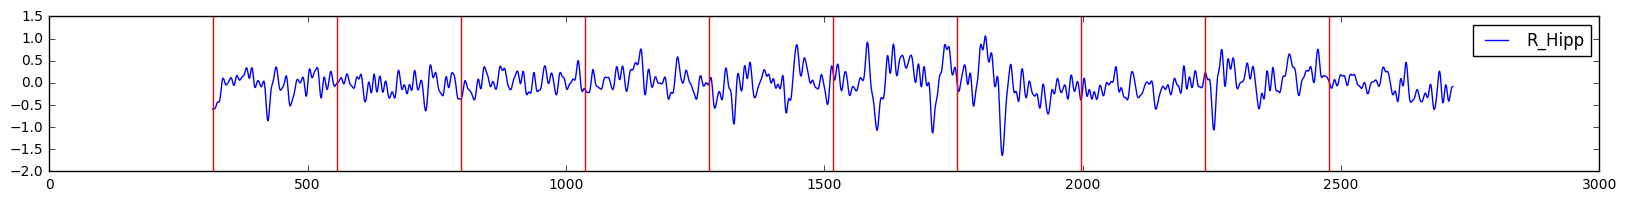

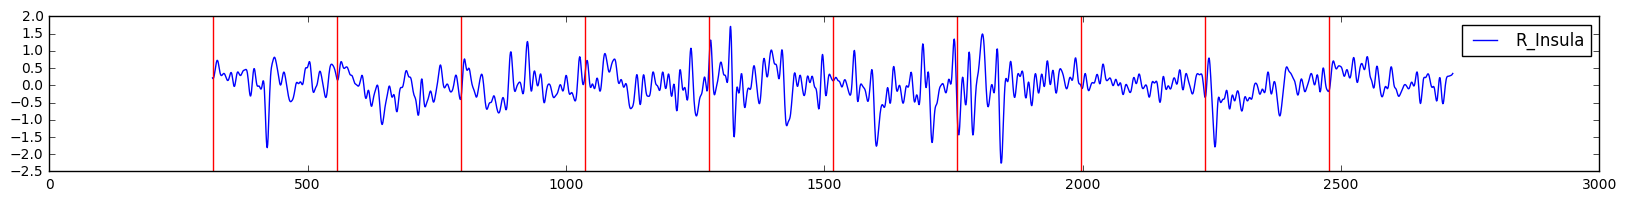

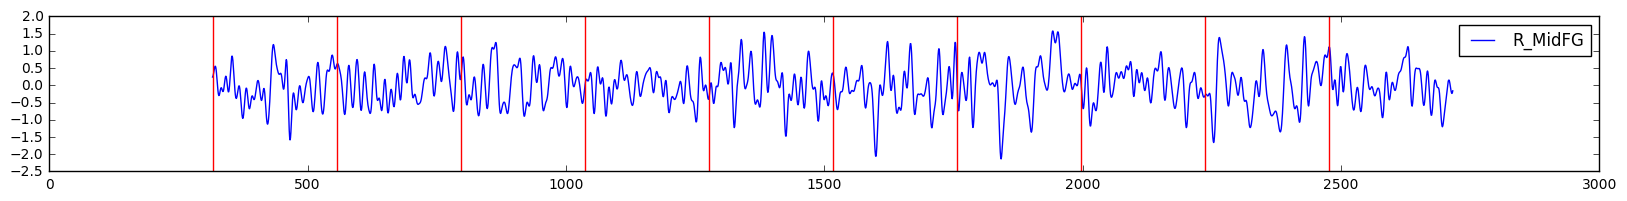

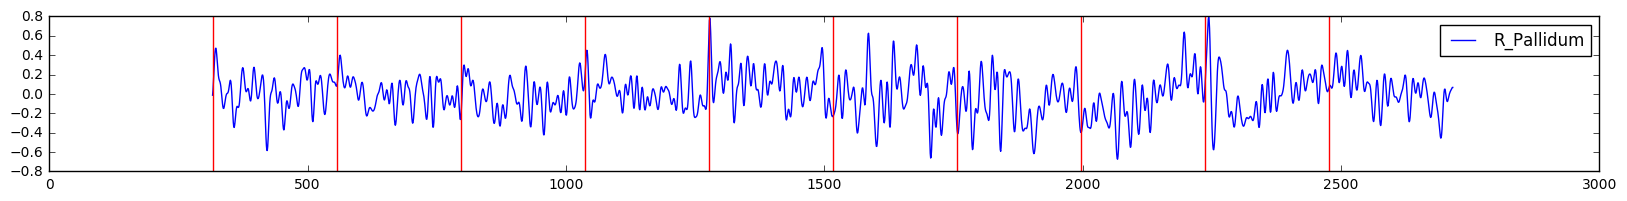

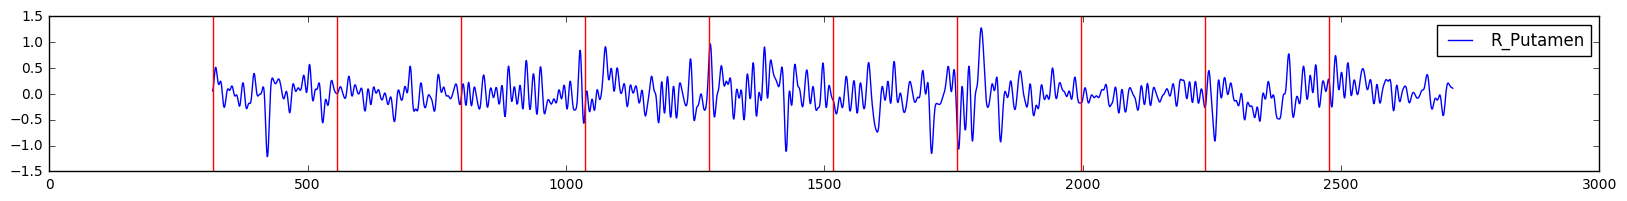

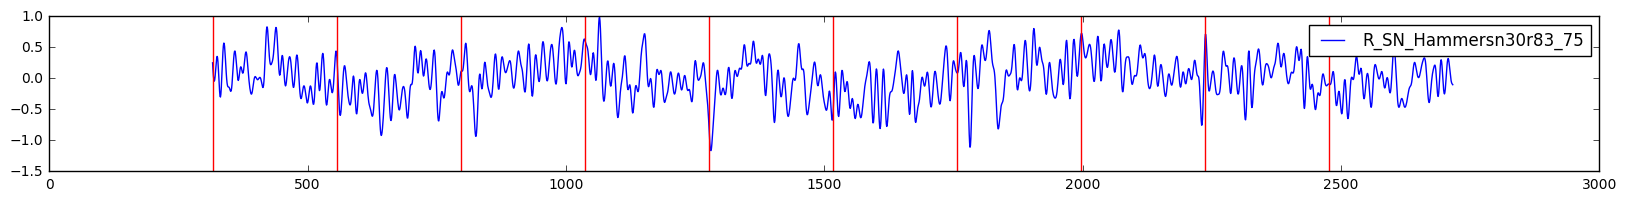

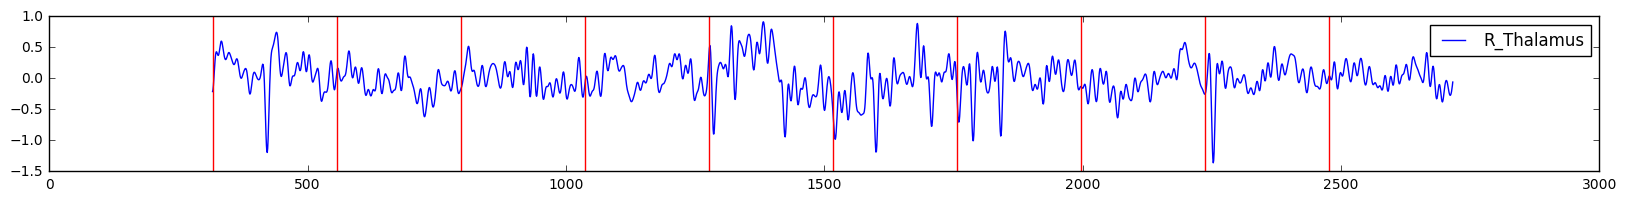

In [12]:
# comment about the indexing:
# the puffs start at second 316 and then happen every 4min = 240sec
# 316/0.802 = 394
# 2400/0.802 = 2992.52
data_filtered_low = None
for trace,name in zip(data,roinames):
    trace_filtered_low = butter_lowpass_filter(trace,0.1,sampling_freq,order=5)
    plt.figure(figsize=(20,2))
    plt.plot(t[394:394+2994],trace_filtered_low[394:394+2994],label=name[0])
#    plt.xlim((0,1000))
    for p in puffs:
        plt.axvline(x=p,color="r")
    plt.legend()
    if data_filtered_low is None:
        data_filtered_low = trace_filtered_low
    else:
        data_filtered_low = np.vstack((data_filtered_low,trace_filtered_low))

In [13]:
def pearson_combined(data):
    results = None
    for perm in itertools.combinations(range(data.shape[0]),2):
        pc=pearsonr(data[perm[0]],data[perm[1]])
        result=np.array([perm[0],perm[1],pc[0],pc[1]])
        if results is None:
            results = result
        else:
            results = np.vstack((results,result))
    return results
results_array = pearson_combined(data_filtered)

In [14]:
sorted_results=results_array[results_array[:,2].argsort()[::-1]]

In [15]:
for i,j,pr,pp in sorted_results:
    print(i,j,roinames[int(i)],roinames[int(j)],pr,pp)

16.0 19.0 ['R_Amygdala'] ['R_Amygdala_SF_Juelich50'] 0.860142246184 0.0
2.0 4.0 ['L_Amygdala'] ['L_Amygdala_LB_Juelich50_minus_intersect'] 0.82873147114 0.0
14.0 28.0 ['L_Thalamus'] ['R_Thalamus'] 0.824971491298 0.0
6.0 20.0 ['L_Caudate'] ['R_Caudate'] 0.824365274294 0.0
2.0 5.0 ['L_Amygdala'] ['L_Amygdala_SF_Juelich50'] 0.819980447784 0.0
9.0 23.0 ['L_Insula'] ['R_Insula'] 0.809036340084 0.0
12.0 26.0 ['L_Putamen'] ['R_Putamen'] 0.803360248024 0.0
16.0 18.0 ['R_Amygdala'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.790553227467 0.0
0.0 9.0 ['ACC'] ['L_Insula'] 0.770164098427 0.0
8.0 22.0 ['L_Hipp'] ['R_Hipp'] 0.750796526101 0.0
0.0 23.0 ['ACC'] ['R_Insula'] 0.748420429844 0.0
18.0 22.0 ['R_Amygdala_LB_Juelich50_minus_intersect'] ['R_Hipp'] 0.73726126965 0.0
2.0 19.0 ['L_Amygdala'] ['R_Amygdala_SF_Juelich50'] 0.719814606271 0.0
0.0 14.0 ['ACC'] ['L_Thalamus'] 0.717867081077 0.0
7.0 21.0 ['L_FOrb'] ['R_FOrb'] 0.716359618405 0.0
9.0 14.0 ['L_Insula'] ['L_Thalamus'] 0.698445676226 0.0
2

In [16]:
def sliding_window_pearson(data1,data2,window_size,step=1):
    pr = [pearsonr(data1[index:index+window_size],data2[index:index+window_size])[0]
          for index in range(0,min(data1.size,data2.size),step)]
    pr = np.array(pr)
    return pr

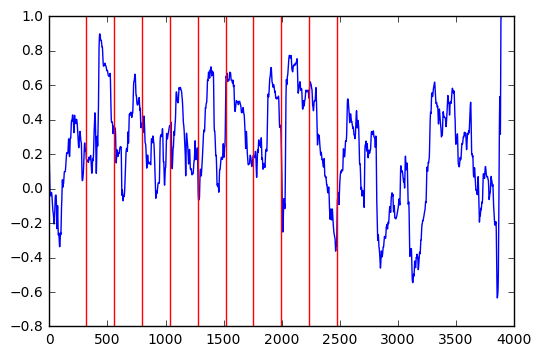

In [17]:
plt.plot(sliding_window_pearson(data_filtered[15],data_filtered[22],100))
for p in puffs:
    plt.axvline(x=p,color="r")


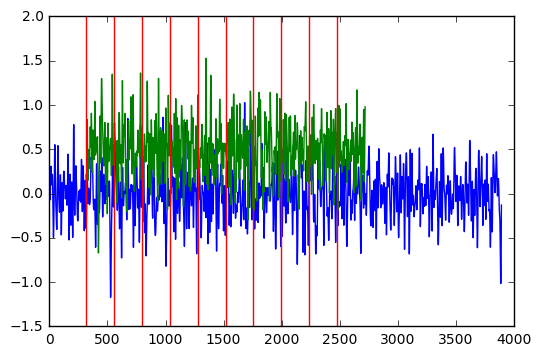

In [18]:
# new strategy:
# we compare pearson correlations of the puffs to r's from time where there is no delivery
# two time series: puffs from first puff to 2min after last puff
# nopuffs - the rest
plt.plot(range(data_filtered[15].size),data_filtered[15])
plt.plot(t[394:394+2994],data_filtered[15][394:394+2994]+0.5)
for p in puffs:
    plt.axvline(x=p,color="r")



In [19]:
data_puffs = data_filtered[:,394:394+2994]
data_nopuffs1=data_filtered[:,:394]
data_nopuffs2=data_filtered[:,394+2994:]
data_nopuffs=np.hstack((data_nopuffs1,data_nopuffs2))
print(data_puffs.shape, data_nopuffs.shape)
print(data_puffs.shape[1]+data_nopuffs.shape[1])

(29, 2994) (29, 896)
3890


In [20]:
results_puffs = pearson_combined(data_puffs)
sorted_results_puffs=results_puffs[results_puffs[:,2].argsort()[::-1]]
for i,j,pr,pp in sorted_results_puffs:
    print(i,j,roinames[int(i)],roinames[int(j)],pr,pp)

16.0 19.0 ['R_Amygdala'] ['R_Amygdala_SF_Juelich50'] 0.863452833384 0.0
6.0 20.0 ['L_Caudate'] ['R_Caudate'] 0.844865345413 0.0
2.0 4.0 ['L_Amygdala'] ['L_Amygdala_LB_Juelich50_minus_intersect'] 0.837907721713 0.0
14.0 28.0 ['L_Thalamus'] ['R_Thalamus'] 0.818184389044 0.0
9.0 23.0 ['L_Insula'] ['R_Insula'] 0.815464783054 0.0
12.0 26.0 ['L_Putamen'] ['R_Putamen'] 0.809283778803 0.0
2.0 5.0 ['L_Amygdala'] ['L_Amygdala_SF_Juelich50'] 0.80001343326 0.0
16.0 18.0 ['R_Amygdala'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.793425595219 0.0
0.0 14.0 ['ACC'] ['L_Thalamus'] 0.769343245451 0.0
0.0 9.0 ['ACC'] ['L_Insula'] 0.76121303096 0.0
7.0 21.0 ['L_FOrb'] ['R_FOrb'] 0.761090751881 0.0
0.0 23.0 ['ACC'] ['R_Insula'] 0.760111224371 0.0
18.0 22.0 ['R_Amygdala_LB_Juelich50_minus_intersect'] ['R_Hipp'] 0.755078764495 0.0
9.0 14.0 ['L_Insula'] ['L_Thalamus'] 0.73631662088 0.0
8.0 22.0 ['L_Hipp'] ['R_Hipp'] 0.733953100619 0.0
0.0 28.0 ['ACC'] ['R_Thalamus'] 0.715983219549 0.0
2.0 19.0 ['L_Amygdala'

In [21]:
results_nopuffs = pearson_combined(data_nopuffs)
sorted_results_nopuffs=results_nopuffs[results_nopuffs[:,2].argsort()[::-1]]
for i,j,pr,pp in sorted_results_nopuffs:
    print(i,j,roinames[int(i)],roinames[int(j)],pr,pp)

2.0 5.0 ['L_Amygdala'] ['L_Amygdala_SF_Juelich50'] 0.873518324299 9.31474392204e-282
16.0 19.0 ['R_Amygdala'] ['R_Amygdala_SF_Juelich50'] 0.854438974428 1.84697354676e-256
14.0 28.0 ['L_Thalamus'] ['R_Thalamus'] 0.847179633239 9.04854814675e-248
0.0 9.0 ['ACC'] ['L_Insula'] 0.813773964396 6.45849376213e-213
2.0 4.0 ['L_Amygdala'] ['L_Amygdala_LB_Juelich50_minus_intersect'] 0.807467815723 4.00225208527e-207
8.0 22.0 ['L_Hipp'] ['R_Hipp'] 0.805552066946 2.08718455356e-205
16.0 18.0 ['R_Amygdala'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.796671951734 1.08725020021e-197
4.0 8.0 ['L_Amygdala_LB_Juelich50_minus_intersect'] ['L_Hipp'] 0.793057355366 1.16978680965e-194
9.0 23.0 ['L_Insula'] ['R_Insula'] 0.776393707102 1.99131849458e-181
12.0 26.0 ['L_Putamen'] ['R_Putamen'] 0.771895150638 4.74447033804e-178
2.0 19.0 ['L_Amygdala'] ['R_Amygdala_SF_Juelich50'] 0.753560575669 4.73916757998e-165
16.0 22.0 ['R_Amygdala'] ['R_Hipp'] 0.75349388385 5.25878705373e-165
8.0 16.0 ['L_Hipp'] ['R_Amygd

In [22]:
print(results_puffs.shape)

(406, 4)


In [23]:
results_diffp = results_puffs[:,2]-results_nopuffs[:,2]
results_diff = np.vstack((results_puffs.T,results_diffp)).T
print(results_diff.shape)

(406, 5)


In [24]:
sorted_results_diff=results_diff[results_diff[:,4].argsort()[::-1]]
for i,j,pr,pp,pd in sorted_results_diff:
    print(i,j,roinames[int(i)],roinames[int(j)],pr,pp,pd)

14.0 22.0 ['L_Thalamus'] ['R_Hipp'] 0.41713668638 2.20159741892e-126 0.804684456541
8.0 14.0 ['L_Hipp'] ['L_Thalamus'] 0.401124870798 3.83987637189e-116 0.793516818293
22.0 28.0 ['R_Hipp'] ['R_Thalamus'] 0.369699956391 1.28718114285e-97 0.694665879157
14.0 16.0 ['L_Thalamus'] ['R_Amygdala'] 0.224165189323 2.06133849652e-35 0.667758283139
4.0 14.0 ['L_Amygdala_LB_Juelich50_minus_intersect'] ['L_Thalamus'] 0.392828981634 4.71341246267e-111 0.628651649676
22.0 24.0 ['R_Hipp'] ['R_MidFG'] 0.311152102981 3.24429911882e-68 0.627993400625
14.0 18.0 ['L_Thalamus'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.391943691985 1.61376407329e-110 0.614316517605
2.0 14.0 ['L_Amygdala'] ['L_Thalamus'] 0.424339051144 3.55350893024e-131 0.610194273723
8.0 28.0 ['L_Hipp'] ['R_Thalamus'] 0.225985060204 5.62383251629e-36 0.607447071455
8.0 24.0 ['L_Hipp'] ['R_MidFG'] 0.14985718757 1.6799254949e-16 0.600831080019
16.0 28.0 ['R_Amygdala'] ['R_Thalamus'] 0.181415060307 1.44079301861e-23 0.551852151555
11.0 22

In [25]:
# now we want to look at the unfiltered data and look at the powerspectrum
data_puffs_nofilter = data[:,394:394+2994]

/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


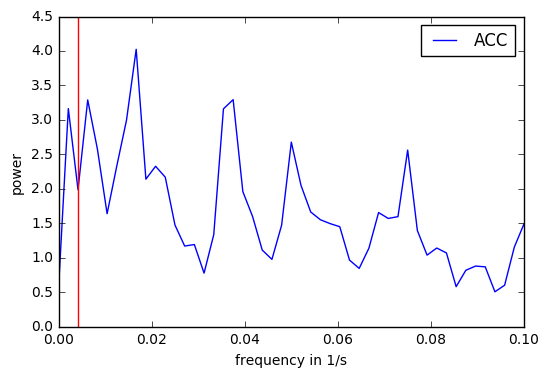

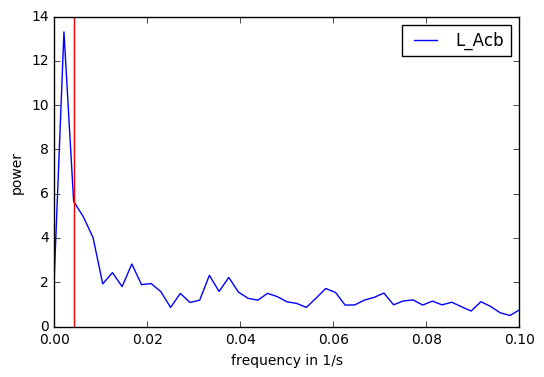

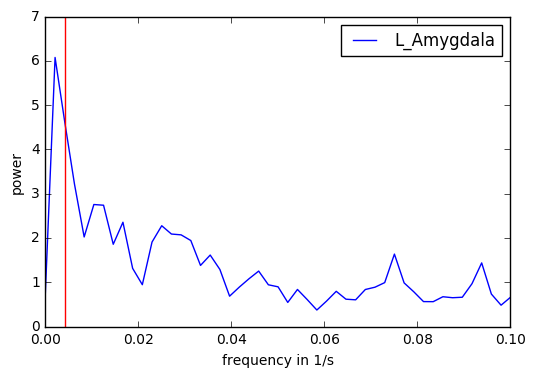

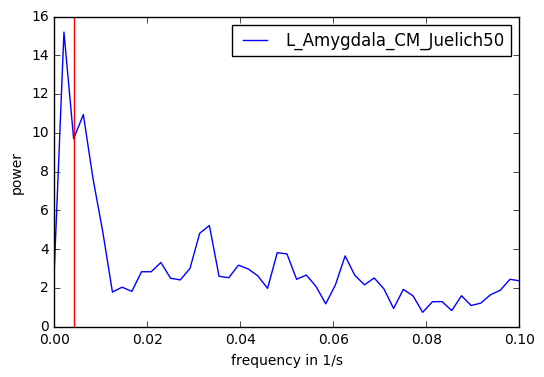

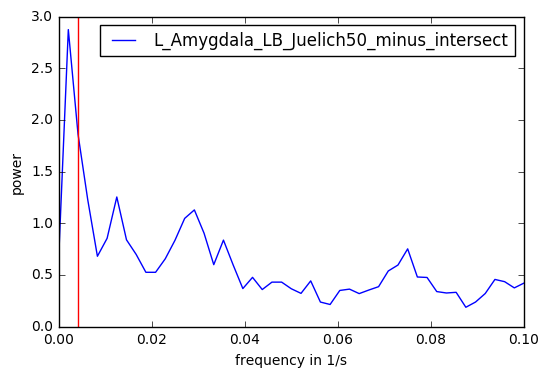

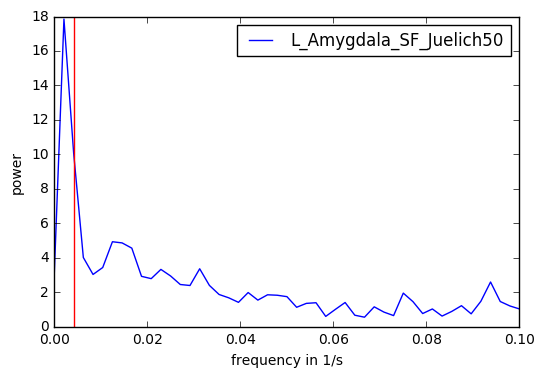

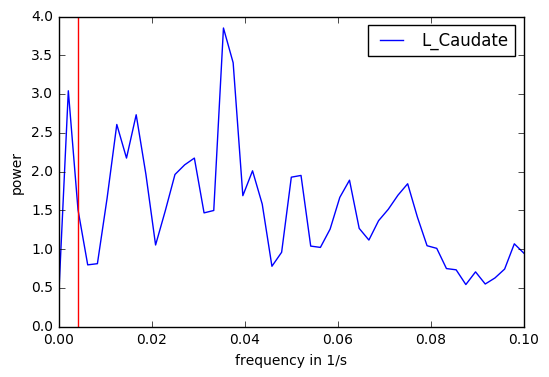

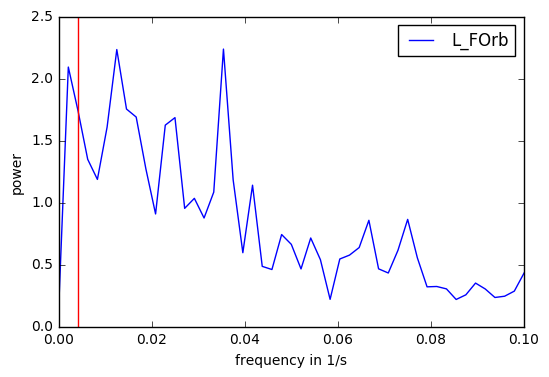

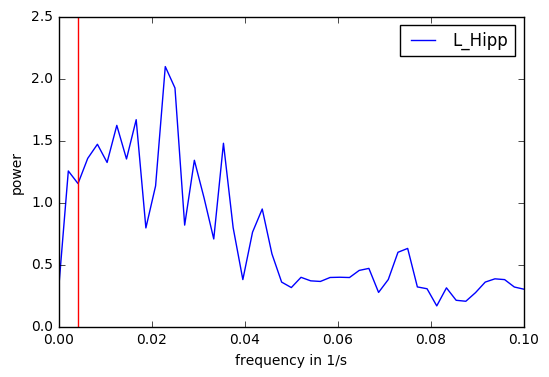

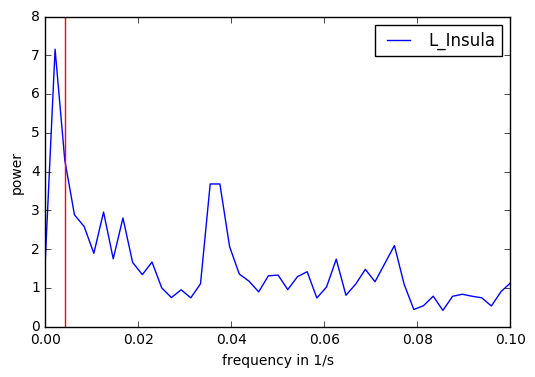

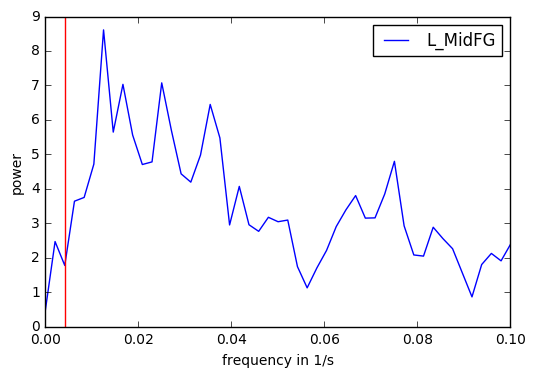

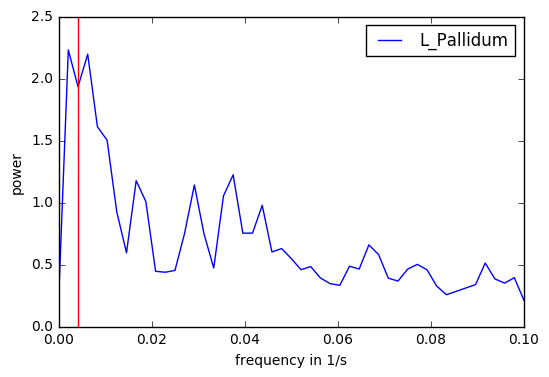

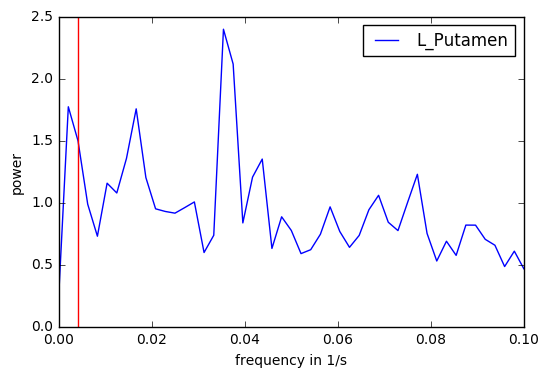

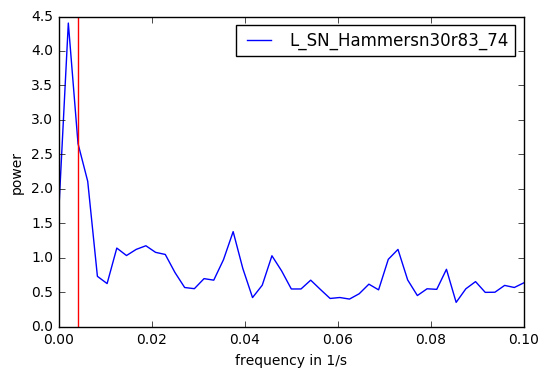

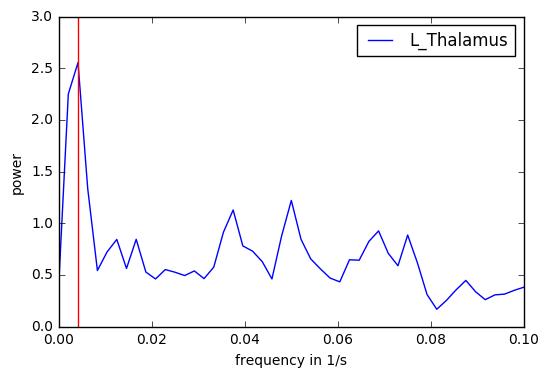

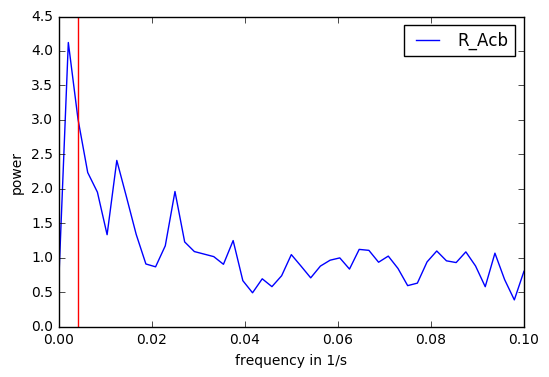

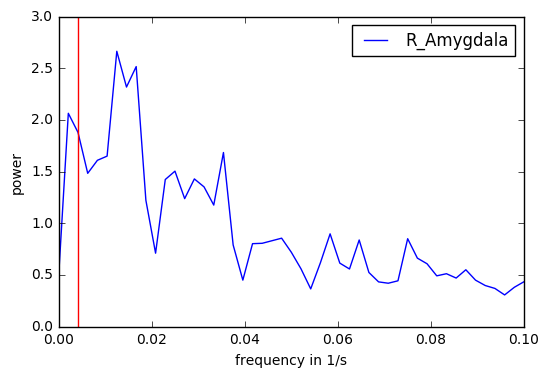

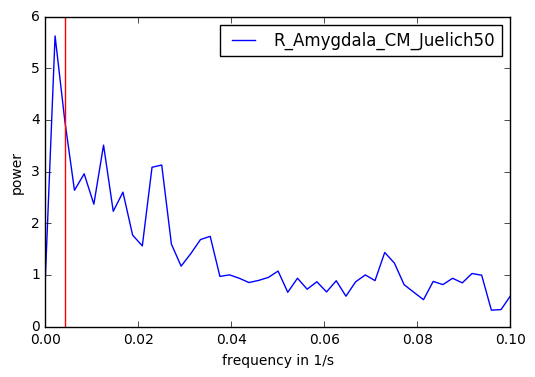

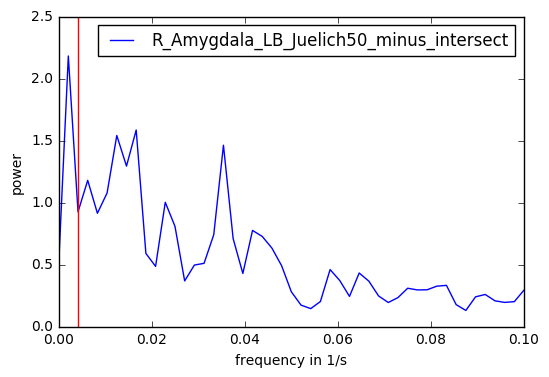

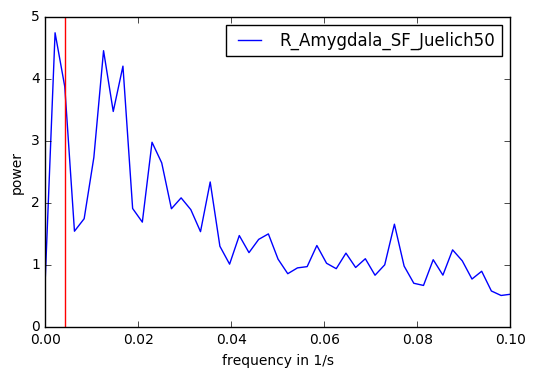

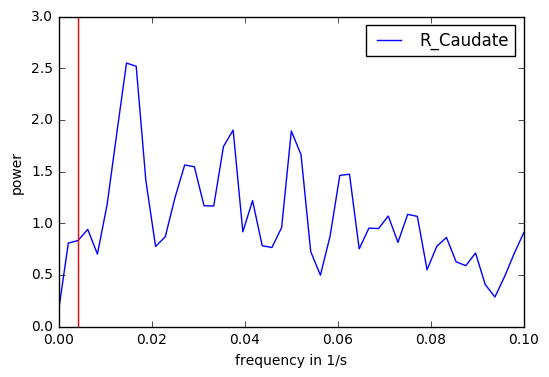

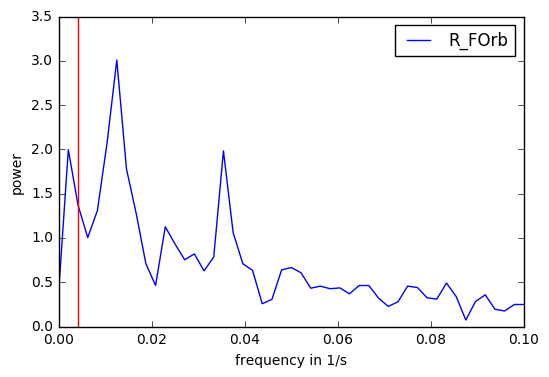

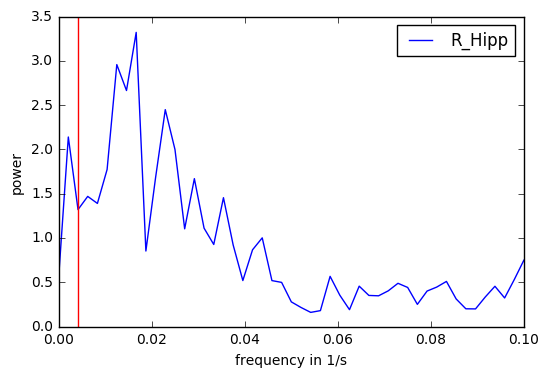

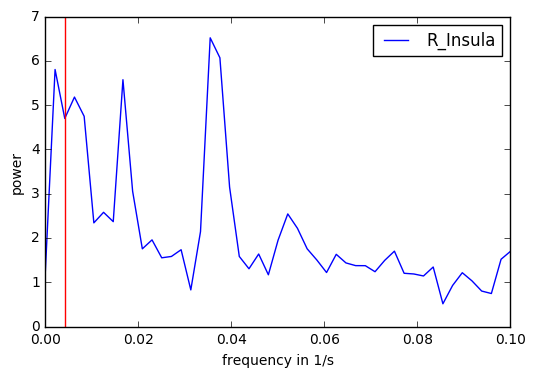

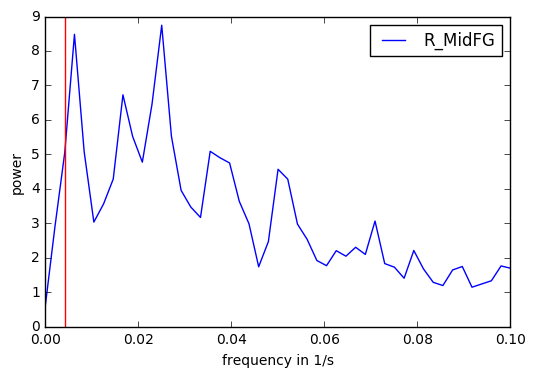

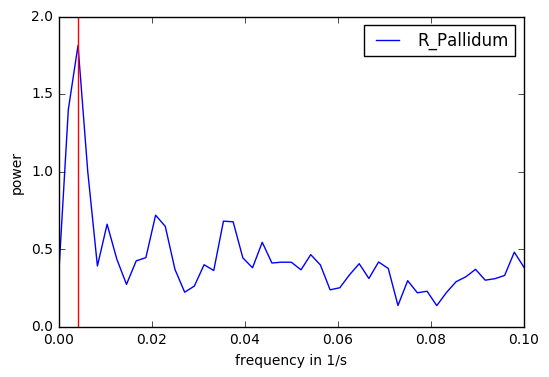

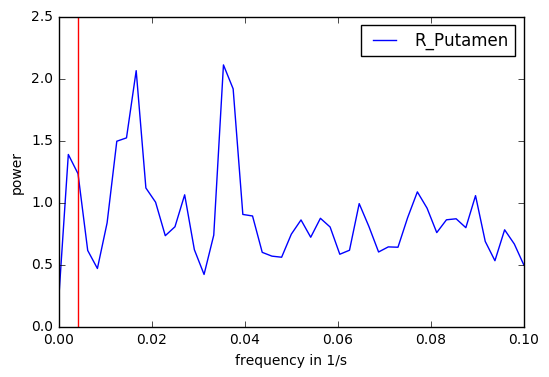

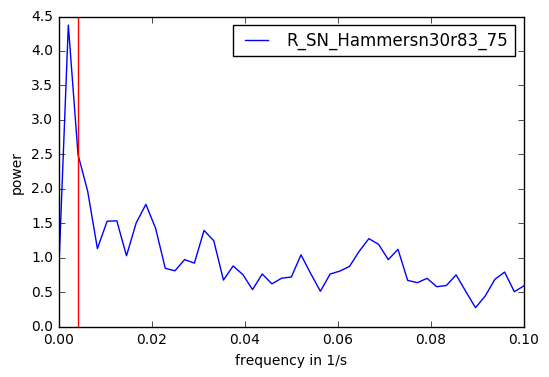

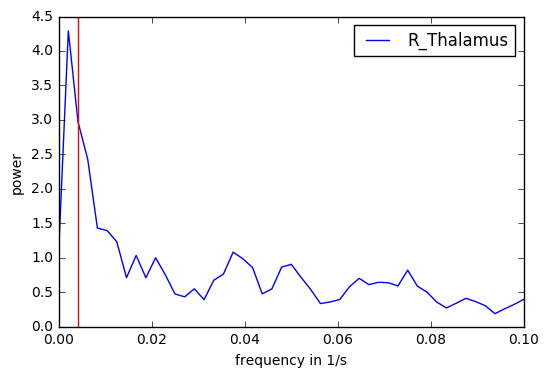

In [26]:
powerspectra = None
for region,roiname in zip(data_puffs_nofilter,roinames):
    f,ps = welch(region,fs=1/0.802,nperseg=598)
    plt.figure()
    plt.plot(f,ps,label=roiname[0])
    plt.xlim((0,0.1))
    plt.xlabel("frequency in 1/s")
    plt.ylabel("power")
    plt.axvline(x=1/240.0,color="r")
    plt.legend()
    if powerspectra is None:
        powerspectra  = ps
    else:
        powerspectra = np.vstack((powerspectra,ps))


In [27]:
print(f)

[ 0.          0.00208509  0.00417018  0.00625526  0.00834035  0.01042544
  0.01251053  0.01459562  0.01668071  0.01876579  0.02085088  0.02293597
  0.02502106  0.02710615  0.02919124  0.03127632  0.03336141  0.0354465
  0.03753159  0.03961668  0.04170177  0.04378685  0.04587194  0.04795703
  0.05004212  0.05212721  0.0542123   0.05629738  0.05838247  0.06046756
  0.06255265  0.06463774  0.06672283  0.06880791  0.070893    0.07297809
  0.07506318  0.07714827  0.07923335  0.08131844  0.08340353  0.08548862
  0.08757371  0.0896588   0.09174388  0.09382897  0.09591406  0.09799915
  0.10008424  0.10216933  0.10425441  0.1063395   0.10842459  0.11050968
  0.11259477  0.11467986  0.11676494  0.11885003  0.12093512  0.12302021
  0.1251053   0.12719039  0.12927547  0.13136056  0.13344565  0.13553074
  0.13761583  0.13970091  0.141786    0.14387109  0.14595618  0.14804127
  0.15012636  0.15221144  0.15429653  0.15638162  0.15846671  0.1605518
  0.16263689  0.16472197  0.16680706  0.16889215  0.1

In [28]:
totalpower=np.mean(powerspectra,axis=1)
print(totalpower.shape)
print(powerspectra.shape)
scaled_PS = np.divide(powerspectra.T,totalpower).T
print(scaled_PS.shape)

sorted_PS =scaled_PS[scaled_PS[:,2].argsort()[::-1]]
sorted_roinames = roinames[scaled_PS[:,2].argsort()[::-1]]
print(sorted_PS.shape)

(29,)
(29, 300)
(29, 300)
(29, 300)


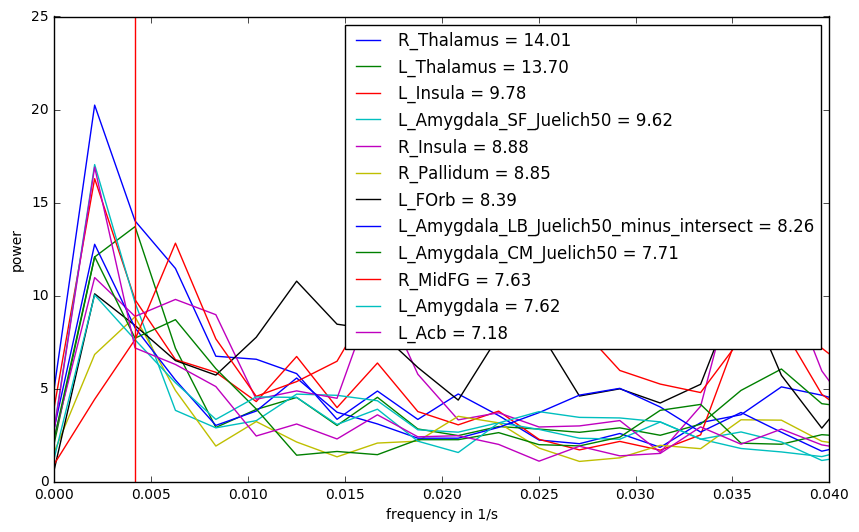

In [32]:
plt.figure(figsize=(10,6))
for spectra,roiname in zip(sorted_PS,sorted_roinames):
    if spectra[2] > 7:
        rel_strength = '{:2.2f}'.format(spectra[2])
        plt.plot(f,spectra,label=roiname[0]+" = "+rel_strength)
        plt.xlim((0,0.04))
    
plt.xlabel("frequency in 1/s")
plt.ylabel("power")
plt.axvline(x=1/240.0,color="r")
plt.legend()



In [30]:
for puff,pufftotal,roiname in zip(powerspectra.T[2],totalpower,roinames):
    print(puff,puff/pufftotal,roiname[0])

1.98473880763 4.73577801528 ACC
5.65184608307 7.17856342715 L_Acb
4.61592619183 7.62109142732 L_Amygdala
9.68938506354 7.70769921116 L_Amygdala_CM_Juelich50
1.86170633539 8.26407560017 L_Amygdala_LB_Juelich50_minus_intersect
10.0746963898 9.6163825015 L_Amygdala_SF_Juelich50
1.50550915054 3.80076930149 L_Caudate
1.73942493237 8.38852014975 L_FOrb
1.15254335002 5.22848104341 L_Hipp
4.29642370777 9.77568804135 L_Insula
1.77245745322 2.4497324262 L_MidFG
1.93313664188 6.81273591254 L_Pallidum
1.49694630668 5.55347993701 L_Putamen
2.65513050391 4.59888065913 L_SN_Hammersn30r83_74
2.55449874976 13.703174869 L_Thalamus
3.00828274149 4.8634440928 R_Acb
1.87782595738 4.43230264632 R_Amygdala
3.99000865906 5.99236721437 R_Amygdala_CM_Juelich50
0.924604554778 4.61931405286 R_Amygdala_LB_Juelich50_minus_intersect
3.86896095481 4.95301741044 R_Amygdala_SF_Juelich50
0.831665362099 2.83072528576 R_Caudate
1.37152139457 6.86875616543 R_FOrb
1.31990348685 5.09198141219 R_Hipp
4.69743951086 8.875438673

In [31]:
for puff,roiname in zip(sorted_PS.T[2],sorted_roinames):
    print(puff,roiname[0])

14.0105777005 R_Thalamus
13.703174869 L_Thalamus
9.77568804135 L_Insula
9.6163825015 L_Amygdala_SF_Juelich50
8.87543867376 R_Insula
8.85229795676 R_Pallidum
8.38852014975 L_FOrb
8.26407560017 L_Amygdala_LB_Juelich50_minus_intersect
7.70769921116 L_Amygdala_CM_Juelich50
7.63152005668 R_MidFG
7.62109142732 L_Amygdala
7.17856342715 L_Acb
6.86875616543 R_FOrb
6.81273591254 L_Pallidum
5.99236721437 R_Amygdala_CM_Juelich50
5.55347993701 L_Putamen
5.22848104341 L_Hipp
5.09198141219 R_Hipp
5.05943370506 R_Putamen
4.95301741044 R_Amygdala_SF_Juelich50
4.8634440928 R_Acb
4.73577801528 ACC
4.61931405286 R_Amygdala_LB_Juelich50_minus_intersect
4.59888065913 L_SN_Hammersn30r83_74
4.43230264632 R_Amygdala
3.80076930149 L_Caudate
3.56246631574 R_SN_Hammersn30r83_75
2.83072528576 R_Caudate
2.4497324262 L_MidFG
